In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chatgpt-user-feedback/clean_chatgpt_reviews.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df=pd.read_csv('/kaggle/input/chatgpt-user-feedback/clean_chatgpt_reviews.csv')
df

,Unnamed: 0,userName,content,score,thumbsUpCount,at
0,0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0,28-06-2024 21:07
1,1,Muhammad bassam adam,perfect,5,0,28-06-2024 20:56
2,2,Chinaza Okoli,its been so helpful...love it,5,0,28-06-2024 20:54
3,3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0,28-06-2024 20:51
4,4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0,28-06-2024 20:50
...,...,...,...,...,...,...
149714,149720,m.santhosh Kumar,Update 2023,5,0,27-07-2023 16:26
149715,149721,Andrew Bourgeois,its grear,5,0,23-09-2023 16:25
149716,149722,Dern Bob,Funtastic App,5,0,08-11-2023 13:57
149717,149723,Abdur rahman arif,hi all,5,0,25-07-2023 15:32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149719 entries, 0 to 149718
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     149719 non-null  int64 
 1   userName       149719 non-null  object
 2   content        149719 non-null  object
 3   score          149719 non-null  int64 
 4   thumbsUpCount  149719 non-null  int64 
 5   at             149719 non-null  object
dtypes: int64(3), object(3)
memory usage: 6.9+ MB


In [5]:
df.isnull().sum()

Unnamed: 0       0
userName         0
content          0
score            0
thumbsUpCount    0
at               0
dtype: int64

In [6]:
df.head()

,Unnamed: 0,userName,content,score,thumbsUpCount,at
0,0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0,28-06-2024 21:07
1,1,Muhammad bassam adam,perfect,5,0,28-06-2024 20:56
2,2,Chinaza Okoli,its been so helpful...love it,5,0,28-06-2024 20:54
3,3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0,28-06-2024 20:51
4,4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0,28-06-2024 20:50


In [7]:
df.nunique()

Unnamed: 0       149719
userName         138416
content           98995
score                 5
thumbsUpCount       230
at               115108
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,score,thumbsUpCount
count,149719.000000,149719.000000,149719.000000
mean,74861.348252,4.491848,0.492937
std,43221.928693,1.096859,12.285116
min,0.000000,1.000000,0.000000
25%,37430.500000,5.000000,0.000000
50%,74860.000000,5.000000,0.000000
75%,112291.500000,5.000000,0.000000
max,149724.000000,5.000000,1193.000000


In [9]:
df['at'] = pd.to_datetime(df['at'], format='%d-%m-%Y %H:%M')
df


,Unnamed: 0,userName,content,score,thumbsUpCount,at
0,0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0,2024-06-28 21:07:00
1,1,Muhammad bassam adam,perfect,5,0,2024-06-28 20:56:00
2,2,Chinaza Okoli,its been so helpful...love it,5,0,2024-06-28 20:54:00
3,3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0,2024-06-28 20:51:00
4,4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0,2024-06-28 20:50:00
...,...,...,...,...,...,...
149714,149720,m.santhosh Kumar,Update 2023,5,0,2023-07-27 16:26:00
149715,149721,Andrew Bourgeois,its grear,5,0,2023-09-23 16:25:00
149716,149722,Dern Bob,Funtastic App,5,0,2023-11-08 13:57:00
149717,149723,Abdur rahman arif,hi all,5,0,2023-07-25 15:32:00


Text(0.5, 1.0, 'Distribution of Scores')

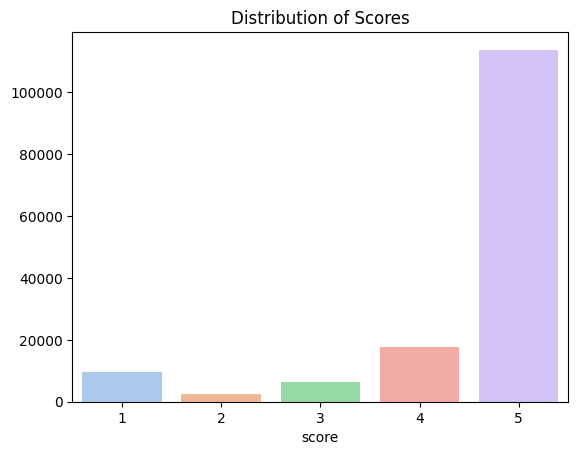

In [10]:
sns.set_palette("pastel")
scores=df['score'].value_counts()
sns.barplot(x=scores.index,y=scores.values)
plt.title('Distribution of Scores')

In [11]:
import datetime as dt

In [12]:
df['year']=df['at'].dt.year
df

,Unnamed: 0,userName,content,score,thumbsUpCount,at,year
0,0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0,2024-06-28 21:07:00,2024
1,1,Muhammad bassam adam,perfect,5,0,2024-06-28 20:56:00,2024
2,2,Chinaza Okoli,its been so helpful...love it,5,0,2024-06-28 20:54:00,2024
3,3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0,2024-06-28 20:51:00,2024
4,4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0,2024-06-28 20:50:00,2024
...,...,...,...,...,...,...,...
149714,149720,m.santhosh Kumar,Update 2023,5,0,2023-07-27 16:26:00,2023
149715,149721,Andrew Bourgeois,its grear,5,0,2023-09-23 16:25:00,2023
149716,149722,Dern Bob,Funtastic App,5,0,2023-11-08 13:57:00,2023
149717,149723,Abdur rahman arif,hi all,5,0,2023-07-25 15:32:00,2023


In [13]:
df['month']=df['at'].dt.month
df

,Unnamed: 0,userName,content,score,thumbsUpCount,at,year,month
0,0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0,2024-06-28 21:07:00,2024,6
1,1,Muhammad bassam adam,perfect,5,0,2024-06-28 20:56:00,2024,6
2,2,Chinaza Okoli,its been so helpful...love it,5,0,2024-06-28 20:54:00,2024,6
3,3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0,2024-06-28 20:51:00,2024,6
4,4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0,2024-06-28 20:50:00,2024,6
...,...,...,...,...,...,...,...,...
149714,149720,m.santhosh Kumar,Update 2023,5,0,2023-07-27 16:26:00,2023,7
149715,149721,Andrew Bourgeois,its grear,5,0,2023-09-23 16:25:00,2023,9
149716,149722,Dern Bob,Funtastic App,5,0,2023-11-08 13:57:00,2023,11
149717,149723,Abdur rahman arif,hi all,5,0,2023-07-25 15:32:00,2023,7


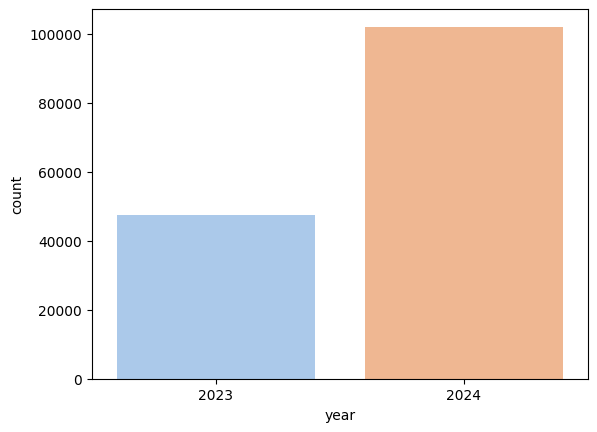

In [14]:
ax=sns.countplot(x=df['year'])


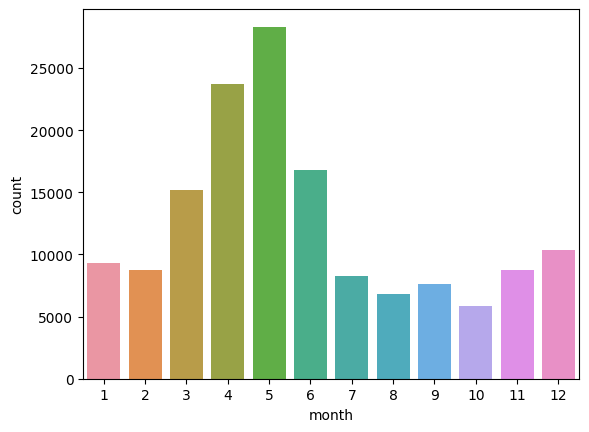

In [15]:
ax=sns.countplot(x=df['month'])


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Avarge Score over month')

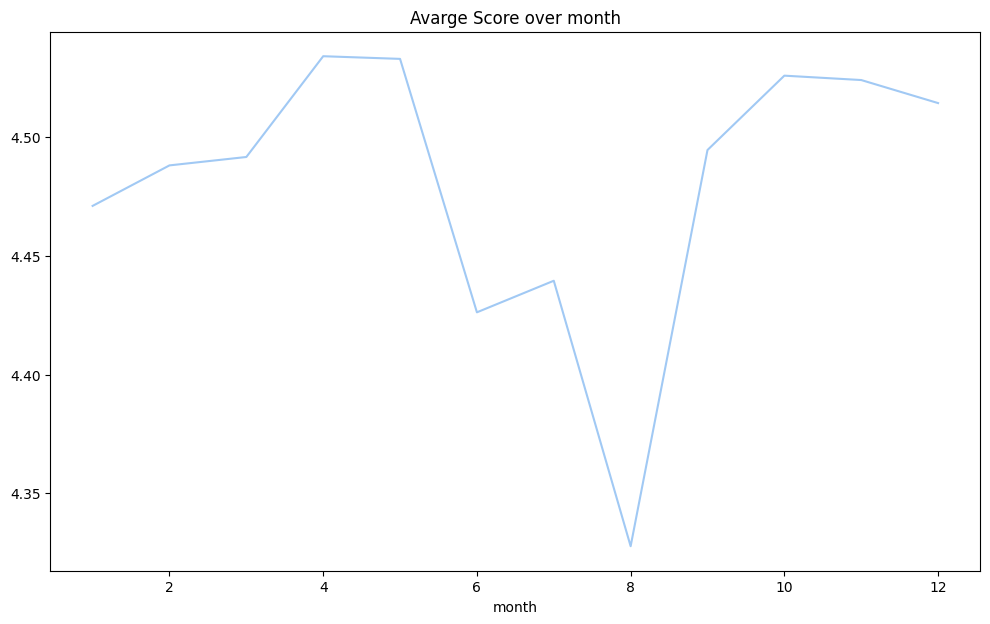

In [16]:
avg_scores=df.groupby('month')['score'].mean()
plt.figure(figsize=(12,7))
sns.lineplot(x=avg_scores.index,y=avg_scores.values)
plt.title('Avarge Score over month')

In [17]:
df['sentiment']=df['score'].replace({5:'positive',4:'positive',3:'neutral',2:'negative',1:'negative'})


<Axes: xlabel='sentiment'>

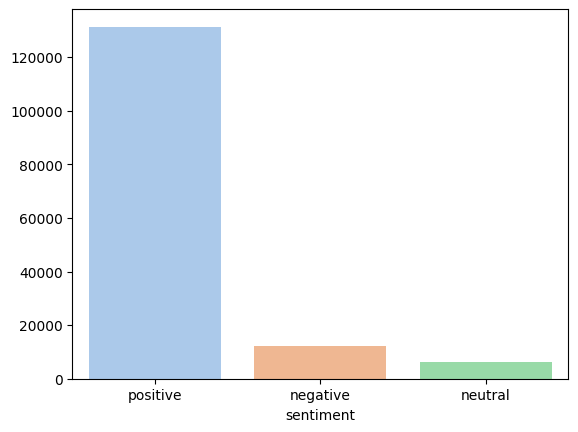

In [18]:
sent=df['sentiment'].value_counts()
sns.barplot(x=sent.index,y=sent.values)
